<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sea

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.columns
df.ENROLL = df.ENROLL.fillna(df.GRADES_ALL_G)
df.count()

PRIMARY_KEY                     602
STATE                           602
YEAR                            602
ENROLL                          528
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
GRADES_PK_G                     518
GRADES_KG_G                     528
GRADES_4_G                      528
GRADES_8_G                      528
GRADES_12_G                     528
GRADES_1_8_G                    397
GRADES_9_12_G                   448
GRADES_ALL_G                    528
AVG_MATH_4_SCORE                564
AVG_MATH_8_SCORE                602
AVG_READING_4_SCORE             521
AVG_READING_8_SCORE             478
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **Math for 8th grade**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
df2 = df.value_counts("YEAR")
len(df2) #Gives 33 

df["YEAR"].nunique() #Also gives 33

13

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [5]:
mich_mean = df[df["STATE"]=="MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
ohio_mean = df[df["STATE"]=="OHIO"]["AVG_MATH_8_SCORE"].mean()
print("MICHIGAN MEAN: " + str(mich_mean) + "\nOHIO MEAN: " + str(ohio_mean))
print("OHIO has the higher average predictor score across all years")

MICHIGAN MEAN: 276.1666666666667
OHIO MEAN: 282.25
OHIO has the higher average predictor score across all years


Find the average for your predictor score across all states in 2019

In [6]:
df["AVG_MATH_8_SCORE"].mean()

278.28073089700996

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [7]:
dict = []
df2 = df.groupby("STATE").max()
df2["AVG_MATH_8_SCORE"]      

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [8]:
#Features that are important --> All Revenues, All Expenditures, State, AVG MATH 8 Score, Instruction Expenditure per Student, and Support Services per Student
df["SS_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"]/df["GRADES_ALL_G"]
df["INSTRUCT_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"]/df["GRADES_ALL_G"]
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"]/df["GRADES_ALL_G"]


Final feature list: **<Total Revenue per student, SS per Student, Instruct per student, AVG MATH 8\>**

Feature selection justification: 
I chose total revenue per student because it's helpful to see how much overall funding each state has as more money = more resources regardless of which section of federal, local, or state it comes from. The Instruction and Support services per student are important as it helps us see how much money is going into instruction and support services for each student in the state. Lastly, I will need the AVG MATH SCORE 8th Grade as its the value I'm comparing.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, '8th grade math score based on how much money goes into instruction per student')

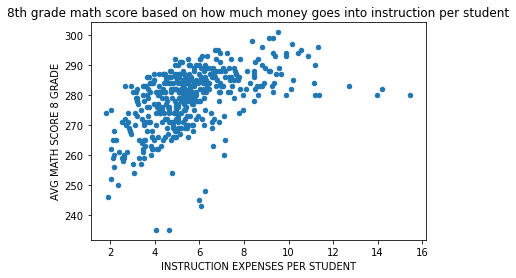

In [9]:
df.plot.scatter(x="INSTRUCT_PER_STUDENT", y = "AVG_MATH_8_SCORE")
mat.ylabel("AVG MATH SCORE 8 GRADE")
mat.xlabel("INSTRUCTION EXPENSES PER STUDENT")
mat.title("8th grade math score based on how much money goes into instruction per student")

This visualization shows how up to a certain point the more money invested into instruction per student in the state the greater the average reading scores tend to be. Its a positive correlation between Instruction Expense per Student and Score

**Visualization 2**

Text(0.5, 1.0, '8th grade math score based on how much money goes into support services per student')

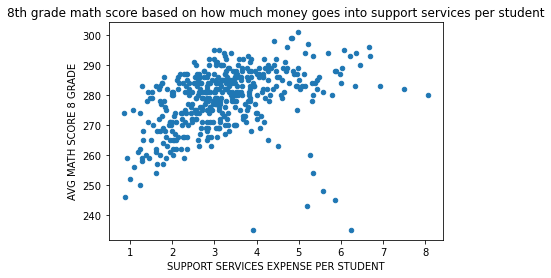

In [10]:
df.plot.scatter(x="SS_PER_STUDENT", y = "AVG_MATH_8_SCORE")
mat.ylabel("AVG MATH SCORE 8 GRADE")
mat.xlabel("SUPPORT SERVICES EXPENSE PER STUDENT")
mat.title("8th grade math score based on how much money goes into support services per student")

This graph follows a similar general trend between the support services expense per student and AVG MATH Score in 8th grade as the visual from just above relating Instruction expense per student to AVG MATH Score in 8th grade. These both show how the more money per student invested into those basic resources leads to better scores

Text(0.5, 1.0, '8th grade math score based on how much total revenue the state has per student')

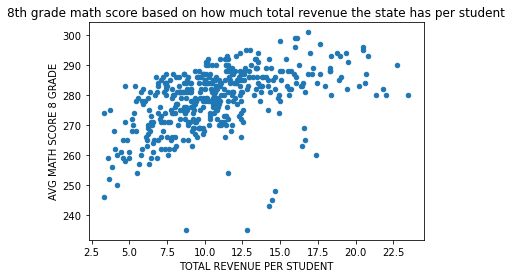

In [11]:
df.plot.scatter(x="TOTAL_REVENUE_PER_STUDENT", y = "AVG_MATH_8_SCORE")
mat.ylabel("AVG MATH SCORE 8 GRADE")
mat.xlabel("TOTAL REVENUE PER STUDENT")
mat.title("8th grade math score based on how much total revenue the state has per student")

This graph follows a similar general trend to both the other graphs. There is a clear positive correlation to total revenue per student and AVG MATH SCORE in 8th grade. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[["TOTAL_REVENUE_PER_STUDENT", "SS_PER_STUDENT", "INSTRUCT_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **< Linear Regression Model>**

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
 #                        cmap=mat.cm.Blues)

Text(0, 0.5, 'MATH 8 SCORE')

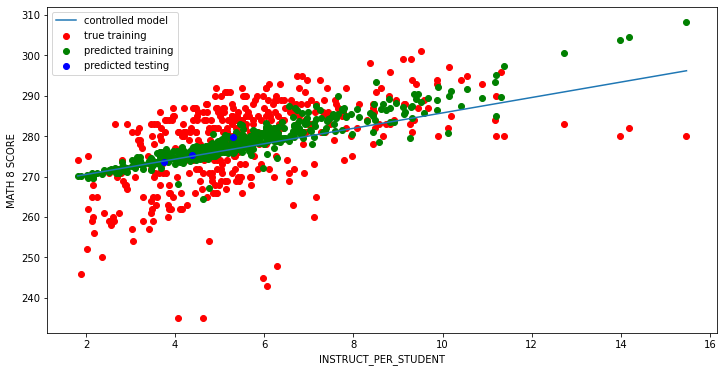

In [20]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "INSTRUCT_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = mat.figure(figsize=(12,6))
mat.scatter(X_train[col_name], y_train, color = "red")
mat.scatter(X_train[col_name], model.predict(X_train), color = "green")
mat.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
mat.plot(new_x, intercept+new_x*model.coef_[col_index])

mat.legend(['controlled model','true training','predicted training','predicted testing'])
mat.xlabel(col_name)
mat.ylabel("MATH 8 SCORE")

<h2> Summary </h2>

Using the three features I had picked (total revenue per student, instruction expense per student, and support service expense per student) I was able to discover features that cause the average math score in 8th grade to be different amongst states. In the miniture graphs it became clear that increases the amount of money for all three of those features per student in the state the scores earned on exams increased. This makes a lot of sense logically because the better the support programs and instruction is the better students should be doing. Also the more money readily available the more you are able to spend on those things explaining on total revenue per student also generated a positive correlation. Lastly using a model that focused on those features I was able to create a model that had most of the data condensed really close to the testing values. This is a good thing as it shows the features do have a strong correlation with one another and test scores in 8th grade math. All in all if a state wants to increase the average scores on math exams in 8th grade, I would recommend investing more money into instruction and support services for the students.